# Module 2 - Part 1: Thresholds, Morphological Operations, and Filters

## 2.1 Thresholding

In the previous module, applied a simple threshold to the motion image to convert it to a binary image. OpenCV provides a few more methods for thresholding. Those include: Simple Thresholding, Adaptive Thresholding, and Otsu's Thresholding.

### Simple Thresholding
The different Simple Thresholding Techniques are: 

- **THRESH_BINARY**: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
- **THRESH_BINARY_INV**: Inverted or Opposite case of THRESH_BINARY.
- **THRESH_TRUNC**: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
- **THRESH_TOZERO**: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
- **THRESH_TOZERO_INV**: Inverted or Opposite case of THRESH_TOZERO.

Let's see how to apply these thresholding techniques. The function `cv.threshold` is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. The fourth argument is the type of thresholding to be used.

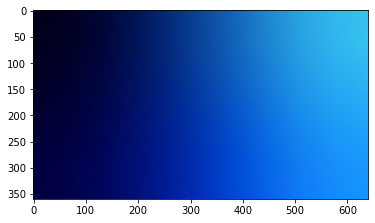

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Show image
plt.imshow(img)
plt.show()

In Computer Vision, this technique of thresholding is done on grayscale images. So initially, the image has to be converted in grayscale color space.

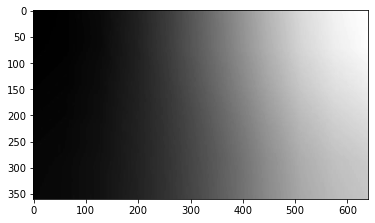

In [3]:
# Convert to grayscale
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Show image
plt.imshow(img, cmap='gray')
plt.show()

Let's apply some thresholds using the `cv.threshold` function and different thresholding techniques.

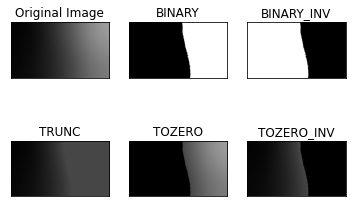

In [4]:
ret, thresh1 = cv.threshold(img, 70, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 70, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 70, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 70, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 70, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method `cv.adaptiveThreshold` takes three input parameters:

- adaptiveMethod: Adaptive method decides how threshold value is calculated.
    - cv.ADAPTIVE_THRESH_MEAN_C: Threshold Value = (Mean of the neighbourhood area values – constant value). In other words, it is the mean of the blockSize×blockSize neighborhood of a point minus constant.
    - cv.ADAPTIVE_THRESH_GAUSSIAN_C: Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value). In other words, it is a weighted sum of the blockSize×blockSize neighborhood of a point minus constant.
- blockSize: Size of a pixel neighborhood that is used to calculate a threshold value.
- constant: A constant value that is subtracted from the mean or weighted sum of the neighbourhood pixels.

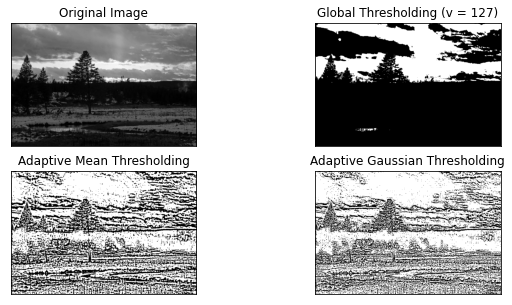

In [5]:
img = cv.imread('data/sunset.jpg', 0)

ret, th1 = cv.threshold(img, 127,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255 , cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Otsu's Binarization

In simple thresholding, we used an arbitrary chosen value as a threshold that we had to pick. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

In Adaptive Thresholding, we use the mean of the neighbourhood area as the threshold value. In Otsu's method, we a single threshold is determined automatically for the entire image.

Otsu's Threshold value:  79.0


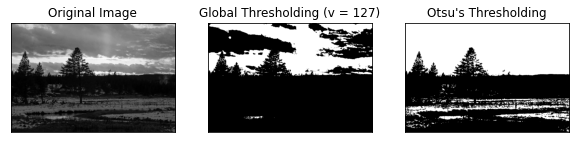

In [6]:
img = cv.imread('data/sunset.jpg', 0)

# global thresholding
ret1,th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print("Otsu's Threshold value: ", ret2)

# Show the results
plt.figure(figsize=(10,5))
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu\'s Thresholding']
images = [img, th1, th2]
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


## 2.2 Morphological Transformations

Morphological operations are used to perform various image processing tasks. For example, we can use morphological transformations to perform image dilations, erosions, opening, closing, etc. These operations are useful in removing noise from an image. They are normally applied to binary images.

### Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object. In a binary image foreground is white. Background is black. The erosion operation is performed by a structuring element called a kernel. The kernel is a matrix of odd size with all elements equal to 1. The kernel is applied to the image pixel by pixel. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (set to zero).

Let use a kernel of size 5x5 and errode the sunset image from the previous example.

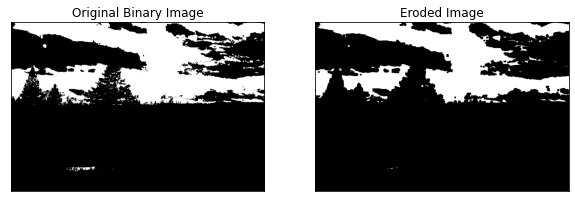

In [7]:
img = cv.imread('data/sunset.jpg', 0)

# global thresholding
ret1, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Apply erosion
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(binary_img, kernel, iterations=1)

# Show original binary and eroded images
plt.figure(figsize=(10,5))
titles = ['Original Binary Image', 'Eroded Image']
images = [binary_img, erosion]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

We notice that in the eroded image, the white pixels have been reduced.

### Dilation

Dilation is the opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases.

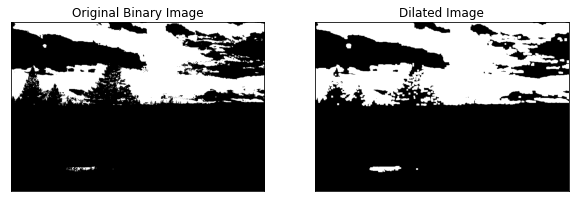

In [8]:
# Apply dilation to binary_img
dilation = cv.dilate(binary_img, kernel, iterations=1)

# Show original binary and dilated images
plt.figure(figsize=(10,5))
titles = ['Original Binary Image', 'Dilated Image']
images = [binary_img, dilation]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


We notice that in the dialated image, the white pixels have been increased.

### Opening and Closing

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object. An erosion followed by dilation is called **opening**.

**Closing** is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object. 

To apply the opening and closing operations we will use the function [`cv.morphologyEx`](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f).


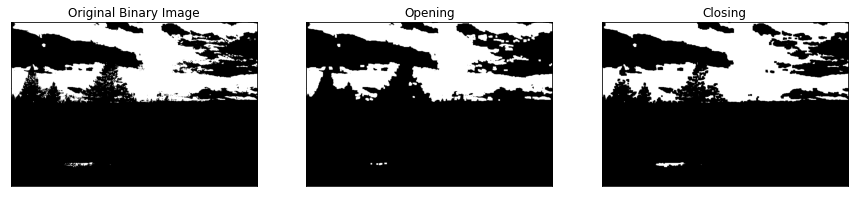

In [9]:
# Apply opening to binary_img
opening = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel)

# Apply closing to binary_img
closing = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel)

# Show original binary, opening, and closing images
plt.figure(figsize=(15,5))
titles = ['Original Binary Image', 'Opening', 'Closing']
images = [binary_img, opening, closing]
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## 2.3 Image filtering (2D Convolution)

The concept of applying a kernel to an image that we saw in the previous morphological operations can be generalized and it is know is image filtering. Applying a filter to an image is very similar to applying a filter to a signal. The filter is a matrix of weights that is applied to the image. The matrix is applied to the image pixel by pixel. The result of the matrix multiplication is the sum of the matrix elements multiplied by the pixel value. This operation is also known as **convolution**.

In the future, the words *filter* and *kernel* will be used interchangeably and they mean the same thing. The most simple type of filter (kernel) is one in which all the elements are equal to 1. Applying such a filter to an image will result in every pixel value in the filter image being replaced by the average of the pixel values covered by the filter.

As an example, let's apply this filter $ K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix} $ to the sunset image. This is also known as a **box filter**.

Notice that the kernel is multiplied by 1/25. This is done to make the sum of the matrix elements equal to 1.

The effect of applying this filter is that the image is **smoothed** or **blurred**. The image is smoothed by averaging the pixel values covered by the filter. The larger the kernel, the more smoothing the image will get.

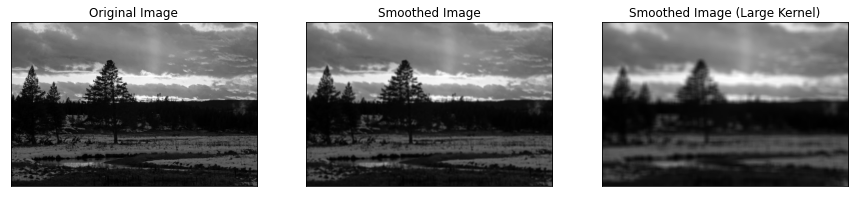

In [10]:
img = cv.imread('data/sunset.jpg', 0)

# Create a kernel of 5x5
kernel = np.ones((5,5), np.float32) / 25

# Apply smoothing to the image using the kernel. -1 means that the kernel is applied to all channels of the image.
# In our case we have loaded the image as a grayscale image, so we only need to apply the kernel to the first channel.
smoothed = cv.filter2D(img, -1, kernel) # 

# Let's also apply a larger kernel to compare the effect
kernel2 = np.ones((15,15), np.float32) / 225
smoothed2 = cv.filter2D(img, -1, kernel2)

# Show the results
plt.figure(figsize=(15,5))
titles = ['Original Image', 'Smoothed Image', 'Smoothed Image (Large Kernel)']
images = [img, smoothed, smoothed2]
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Gaussian Blurring

In this method, instead of a box filter, a Gaussian kernel is used. The Gaussian kernel is a Gaussian distribution with a standard deviation of 1. The effect of applying a gaussian filter instead of a box filter is that pixels near the center of the image get a higher weight. This is known as **Gaussian Blurring**.

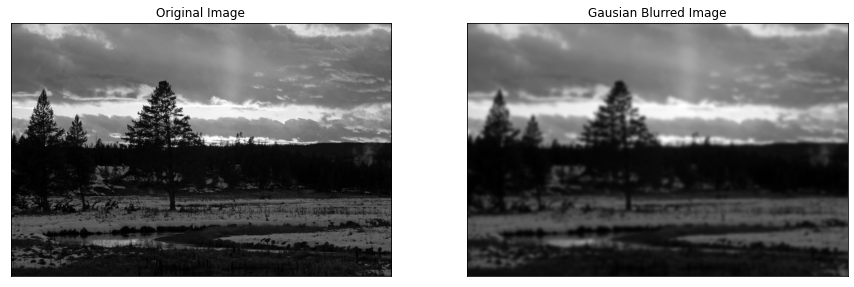

In [11]:
gaussian = cv.GaussianBlur(img, (15,15), 0)

# Show the results
plt.figure(figsize=(15,5))
titles = ['Original Image', 'Gausian Blurred Image']
images = [img, gaussian]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

To better understand what a Gaussian kernel is, let's see how it looks like.

[[0.   0.01 0.02 0.01 0.  ]
 [0.01 0.06 0.1  0.06 0.01]
 [0.02 0.1  0.16 0.1  0.02]
 [0.01 0.06 0.1  0.06 0.01]
 [0.   0.01 0.02 0.01 0.  ]]


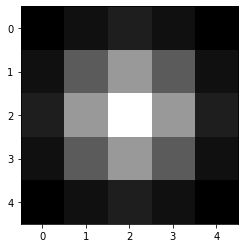

In [12]:
# Generate a 2D Gaussian blurring filter of size (5, 5) with a sigma of 1.
kernel = cv.getGaussianKernel(5, 1)

# The kernel return by the function getGaussianKernel is a vector kernel. To convert it to a 2D matrix,
# we multiply it with its transpose.
kernel = kernel * kernel.T  

# Print the kernel
np.set_printoptions(precision=2)
print(kernel)

# Visualize the kernel as a grayscale image.
plt.imshow(kernel, interpolation='nearest', cmap='gray')

### Why blur?

In our first application of motion detection, setting a low threshold resulted in a lot of white pixels. Those white pixels are caused by noise in the image. On the other hand, we don't want to set the threshold too high, because in that case we will miss some of the pixels of the moving object. So, we need to set a threshold that is a little bit higher than the noise level. Applying blurring to the image will help us to remove the noise and thus be able to set a lower threshold.

Let's repeat that process and apply some blurring to the motion image. We wish show the binary images in both cases without setting the pixels that do not belong the the largest connected component to zero.

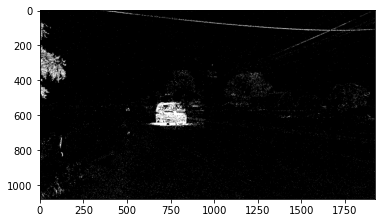

In [13]:
######## Original motion detection process

# Load a video
cap = cv.VideoCapture('./data/Illinois_highway.mp4')

# Extract frame number 5 from the video
cap.set(cv.CAP_PROP_POS_FRAMES, 5)
ret, frame5 = cap.read()
# Convert the frame to gray scale
frame5 = cv.cvtColor(frame5, cv.COLOR_BGR2GRAY)

# Extract frame number 15 from the video
cap.set(cv.CAP_PROP_POS_FRAMES, 15)
ret, frame15 = cap.read()
# Convert the frame to gray scale
frame15 = cv.cvtColor(frame15, cv.COLOR_BGR2GRAY)

# Extract frame number 25 from the video
cap.set(cv.CAP_PROP_POS_FRAMES, 25)
ret, frame25 = cap.read()
# Convert the frame to gray scale
frame25 = cv.cvtColor(frame25, cv.COLOR_BGR2GRAY)

diff1 = cv.absdiff(frame5, frame15)
diff2 = cv.absdiff(frame15, frame25)

motion = cv.min(diff1, diff2)   # Take the minimum of the two differences

# Threshold the image
thresh, binary_img = cv.threshold(motion, thresh = 10, maxval = 255, type = cv.THRESH_BINARY)

# Show the result.
plt.imshow(binary_img, cmap='gray')

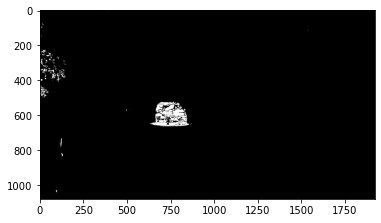

In [14]:
###### Detection process with blurred images

# Extract frame number 5 from the video
cap.set(cv.CAP_PROP_POS_FRAMES, 5)
ret, frame5 = cap.read()
# Convert the frame to gray scale
frame5 = cv.cvtColor(frame5, cv.COLOR_BGR2GRAY)
frame5 = cv.GaussianBlur(frame5, (15,15), 0) # Apply a Gaussian blur to the image

# Extract frame number 15 from the video
cap.set(cv.CAP_PROP_POS_FRAMES, 15)
ret, frame15 = cap.read()
# Convert the frame to gray scale
frame15 = cv.cvtColor(frame15, cv.COLOR_BGR2GRAY)
frame15 = cv.GaussianBlur(frame15, (15,15), 0) # Apply a Gaussian blur to the image

# Extract frame number 25 from the video
cap.set(cv.CAP_PROP_POS_FRAMES, 25)
ret, frame25 = cap.read()
# Convert the frame to gray scale
frame25 = cv.cvtColor(frame25, cv.COLOR_BGR2GRAY)
frame25 = cv.GaussianBlur(frame25, (15,15), 0) # Apply a Gaussian blur to the image

diff1 = cv.absdiff(frame5, frame15)
diff2 = cv.absdiff(frame15, frame25)

motion = cv.min(diff1, diff2)   # Take the minimum of the two differences

# Apply blurring to motion image
motion_blur = cv.GaussianBlur(binary_img, (15,15), 0)

# Threshold the image
thresh, binary_img = cv.threshold(motion, thresh = 10, maxval = 255, type = cv.THRESH_BINARY)

# Show the result.
plt.imshow(binary_img, cmap='gray')

We notice that fewer white pixels are present in the image in which blurring is applied.

### Image Sharpening

Sharpening is the opposite of blurring, and it is a technique that is used to improve the quality of an image. When an image is sharpened, the edges are made more clear. Image sharpening can be achieved in a few different ways. 

One way is to use a sharpening filter like the following:

$$
\text{Sharpening Filter} = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

Let's see how this works.

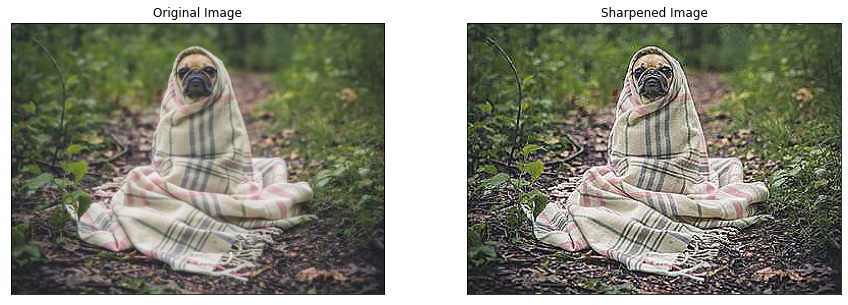

In [15]:
# Load an image
img = cv.imread('data/sharpen.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


### Method1: Sharpen the image by applyting a sharpening filter

sharpening_kernel = np.array([[0, -1,  0],
                              [-1,  5, -1],
                              [0, -1,  0]])

sharp_img = cv.filter2D(src=img, ddepth=-1, kernel=sharpening_kernel)

# Show the original and sharpened image
plt.figure(figsize=(15,5))
titles = ['Original Image', 'Sharpened Image']
images = [img, sharp_img]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Another way by adding a Gaussian blur to the image and then subtracting the original image from the blurred image. The result of this subtraction is an image that contains the edges of the original image. We can then add this edge image back to the original image multiplied by a factor to make the edges stronger.

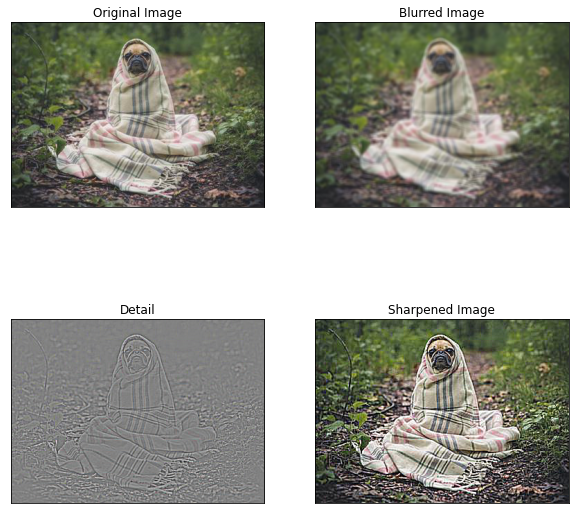

In [16]:
### Method 2: Sharpen the image by subtracting a blurred version of the image from the original image

blurred_img = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT)        # Apply a Gaussian blur to the image

# Subtract the blurred image from the original image. Before we subtract we need to convert the images
# from type uint8 to type int32 to avoid overflow for negative values. 
# Some of the values in the detail image will be negative.
detail = img.astype('int32') - blurred_img.astype('int32') 

# Add the detail image to the original image, multiplied by a factor of 2.
sharp_img = cv.add(img.astype('int'), 2*detail, dtype=cv.CV_8U)

# Normalize the values of the detail image to the range [0, 255] for display.
detail_normalized = cv.normalize(detail, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

# Show the original img, blurred_img, detail_normalized and sharp_img
plt.figure(figsize=(10, 10))
titles = ['Original Image', 'Blurred Image', 'Detail', 'Sharpened Image']
images = [img, blurred_img, detail_normalized, sharp_img]
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()